# Задание по визуализации данных


# 🏃‍♂️🤸‍♂️🏋️‍♀️ 
Ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на следующий год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

В заданиях ставляй свои комментарии о том, какие закономерности видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [176]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Если я использую dropna() на данных, то у меня может пропасть категория sales, так что я не сбрасывал пустые значения.

In [177]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

workouts['start_at'] = pd.to_datetime(workouts.start_at)

# сразу создадим новый датафрейм, в котором соединены тренировки и клиенты
workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')
workouts

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530
...,...,...,...,...,...,...,...,...,...,...
104688,30976738,750.0,2020-11-19 08:00:00,success,single,4831015,active,general,Spartacus,6684752
104689,31118199,750.0,2020-11-21 11:00:00,success,regular,4831015,active,general,Spartacus,6684752
104690,31118238,750.0,2020-11-26 08:00:00,success,single,4831015,active,general,Spartacus,6684752
104691,31600293,750.0,2020-12-03 08:00:00,success,regular,4831015,active,general,Spartacus,6684752


## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь?**

Как это сделать?

1. Работать будем с датафреймом `workouts`.
2. Сгруппируй данные по каждому дню в году (именно дню, а не числу, например 1 января и 1 февраля – это разные дни). Для этого идеально подойдет метод `resemple()`, если не помнишь, как он работает, смело смотри в шпаргалке. После найди количество проведенных тренировок в каждый день и запиши их в переменную `trainings_by_day`.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси `X` 
    - подпись оси `Y` 
4. Удали неполные данные, которые мешают анализу.

In [178]:
workouts_byday = workouts.resample('D', on='start_at')['workout_id'].count()
workouts_byday.head(10)

start_at
2020-01-01     1
2020-01-02     4
2020-01-03     5
2020-01-04     5
2020-01-05     9
2020-01-06    13
2020-01-07     8
2020-01-08    19
2020-01-09    19
2020-01-10    24
Freq: D, Name: workout_id, dtype: int64

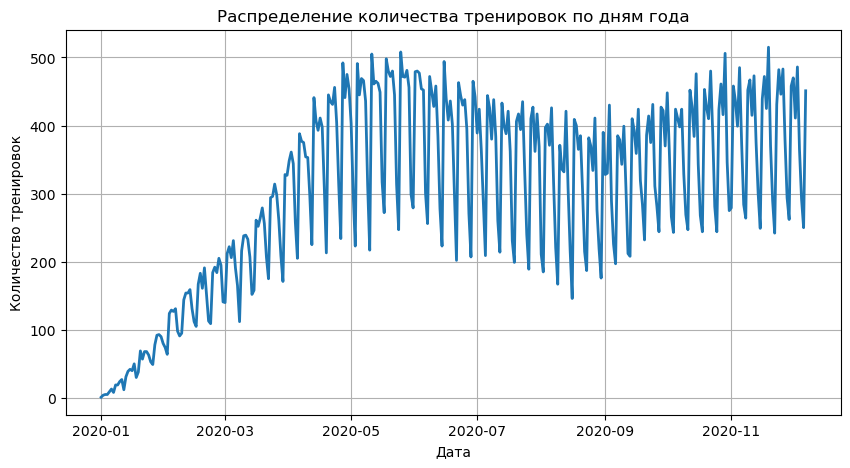

In [179]:
plt.figure(figsize=(10, 5))
plt.title('Распределение количества тренировок по дням года')
plt.xlabel('Дата')
plt.ylabel('Количество тренировок')
plt.grid()

plt.plot(workouts_byday.iloc[:-1], linewidth=2)
plt.show()

**Смотря на график мы можем заметить, что с января по примерно май количество тренировок увеличивается, затемм по июль держится на пике, идёт на спад до сентября и снова возрастает до конца декабря.**

## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. Поэтому по каждому департаменту нам важно узнать, какую нагрузку имеют тренера (в количестве тренировок) и сколько тренеров имеют ту или иную нагрузку. 

**Построй гистограмму распределения, которая покажет, сколько тренеров провели n число тренировок в ноябре. При подсчете постоянных тренеров рассматриваем только тех, которые уже работали в нашей компании до 1 ноября. Сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. В цикле для каждого департамента: 

    - отфильтруй по `trainer_department` тренировки нужного департамента
    - построй гистограмму распределения количества тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
        - задай 5 столбцов
      


In [180]:
# выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

# множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [181]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [182]:
# кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем series в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [183]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

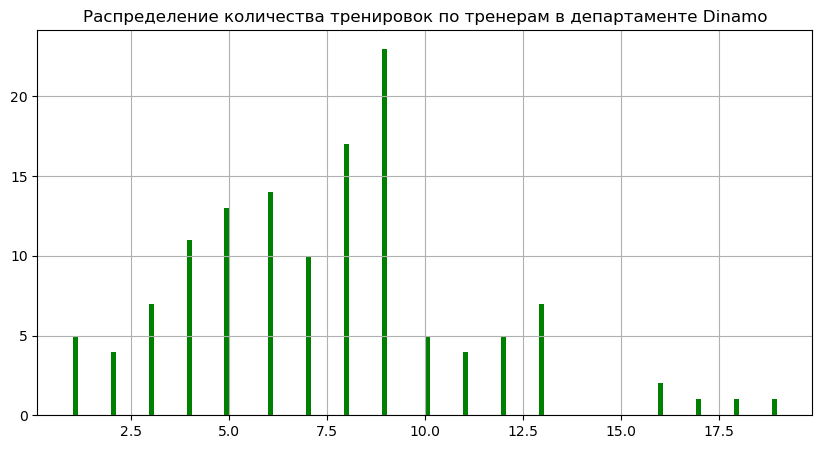

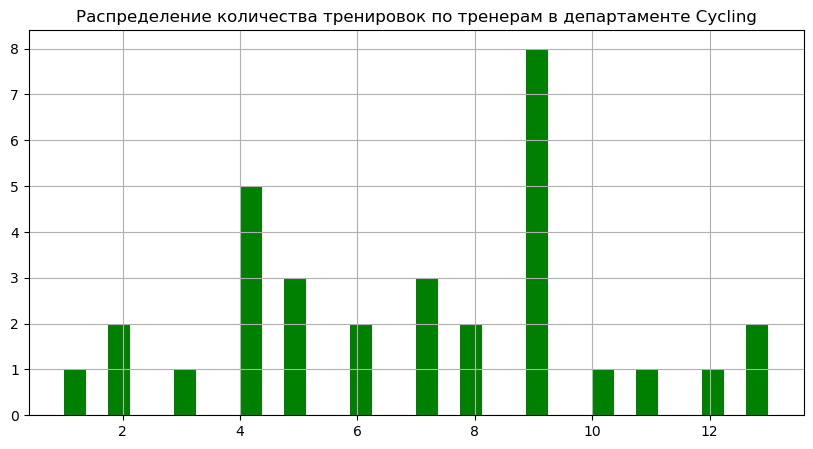

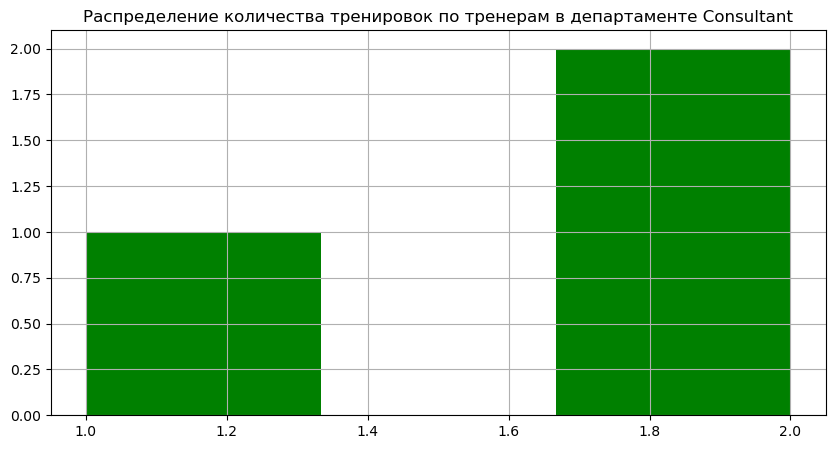

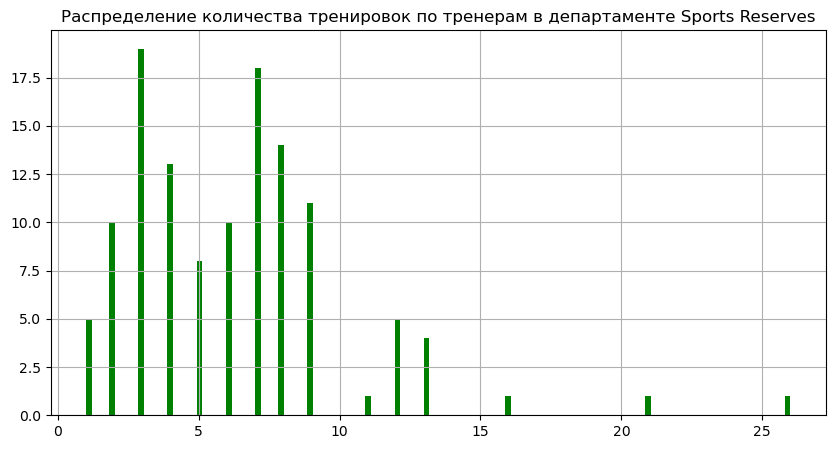

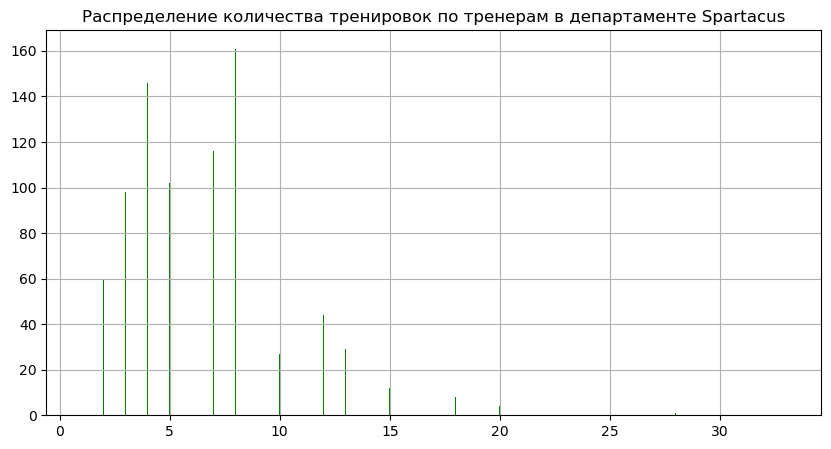

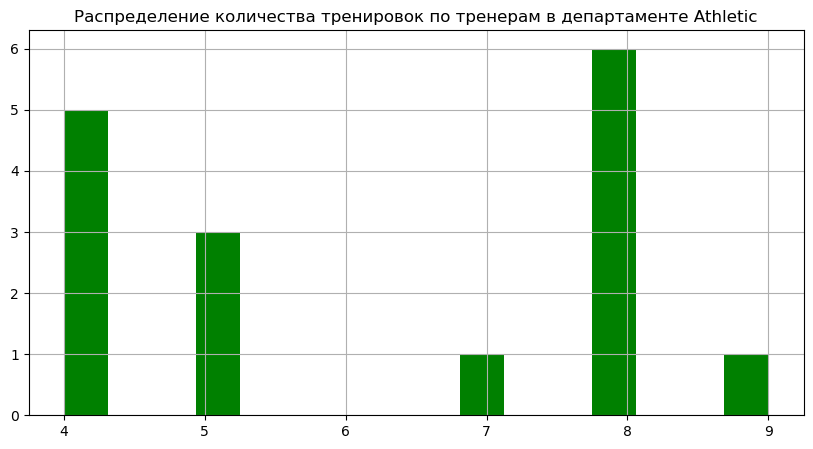

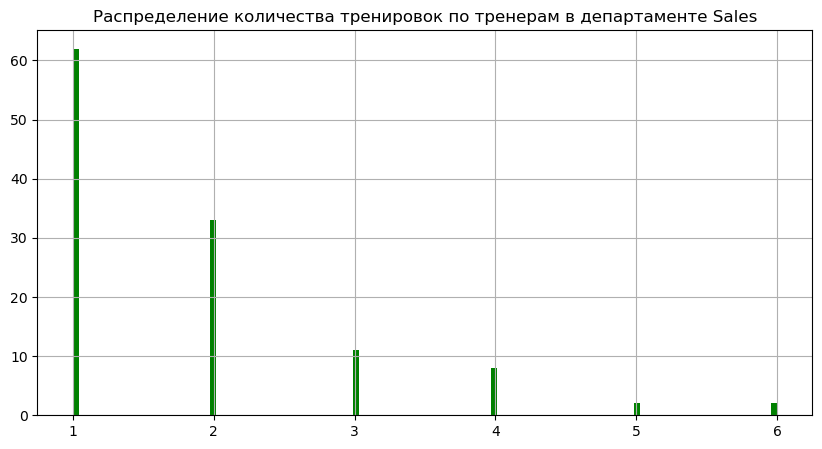

In [184]:

for department in departments:
    filter_workouts_bydepartment = workouts_by_trainer[workouts_by_trainer['trainer_department'] == department]
    c_trainers = filter_workouts_bydepartment['trainer_id'].count()
    plt.figure(figsize=(10, 5))
    plt.title(f'Распределение количества тренировок по тренерам в департаменте {department}')
    plt.xlabel('')
    plt.grid()
    plt.hist(filter_workouts_bydepartment['workouts'], bins=c_trainers, color='g')
    plt.show()

1. В департаменте Sales слишком перегружены первые два тренера, их нагрузку можно распределить между оставшимися тренерами
2. В департаменте Cycling перегружен 4 и 9 тренер, их нагрузку можно распределить между 1, 3, 10, 11, и 12 тренерами
3. В департаменте Spartacus перегружены тренера с 2 по 6
4. В Consult всего два тренера и их нагрузка не слишком сильно различается
5. В Sports Rserves 3, 4, 7, и 8 тренера перегружены
6. В Dinamo перегружены 5, 6, 8, и 9 тренера
7. В Athletic перегружены 1 и 4 тренера

**Нагрузку между перегруженными тренерами можно распределить между другими, более свободными тренерами**

## Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренировок по сравнению с остальными и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В функцию, которая строит boxplot, передай аргументы: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй цвет
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график?

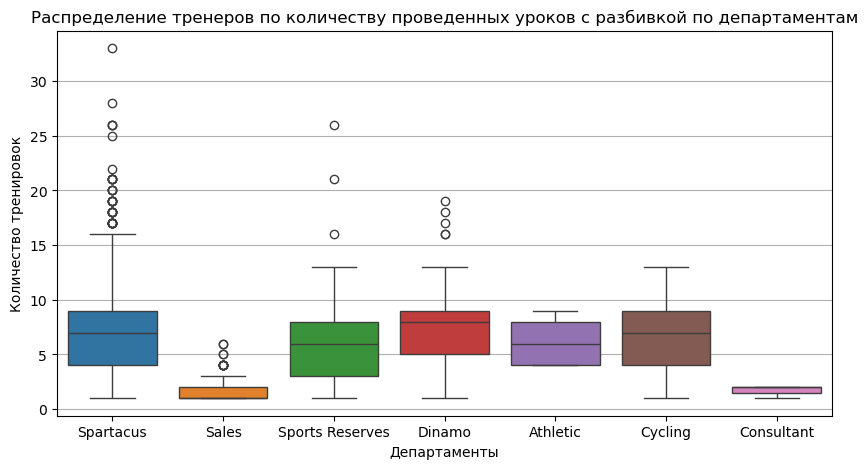

In [185]:
# напиши код здесь
plt.figure(figsize=(10, 5))
plt.title('Распределение тренеров по количеству проведенных уроков с разбивкой по департаментам')
plt.xlabel('Департаменты')
plt.ylabel('Количество тренировок')
plt.grid()
sns.boxplot(data=workouts_by_trainer, x='trainer_department', y='workouts', hue='trainer_department')
# подать просто workouts_by trainer, указать x как workouts и hue list(departments)
plt.show()

По графику мы можем заметить, что перегружены Spartacus, Dinamo и Cycling, а consultant очень сильно проседает.
Можно нанять больше тренеров в Consultant и Sales и распределить лишнюю нагрузку туда.

## Задание 4


Логично, что дешевые тренировки пропускают чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании. Оставь комментарий по каждому графику – видишь ли ты какие-то явные зависимости в данных?**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на `int`
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - используй группировку и создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
    
Подготовим данные:

In [186]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


In [187]:
cost_data = cost_age_data[['status', 'cost']].dropna().copy()
cost_data.head(5)
cost_data_agg = cost_data.groupby(['cost'])['status'].mean().reset_index()
cost_data_agg.head(5)

,cost,status
0,500,0.254996
1,750,0.210409
2,1000,0.158010
3,1500,0.121612


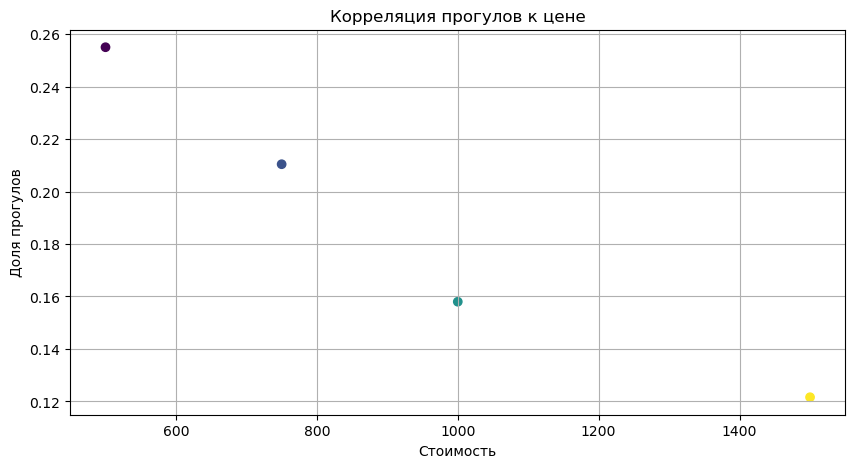

In [188]:
plt.figure(figsize=(10, 5))
plt.scatter(cost_data_agg['cost'], cost_data_agg['status'], c=cost_data_agg['cost'])
plt.title('Корреляция прогулов к цене')
plt.xlabel('Стоимость')
plt.ylabel('Доля прогулов')
plt.grid()

plt.show()

По графику мы можем увидеть, что, как и предполагалось, доля прогулов падает при росте цены за тренировку.

3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - используй группировку и создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот, можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике

In [189]:
age_data = cost_age_data[['status', 'age']].dropna().copy()
age_data.head(5)
age_data_agg = age_data.groupby(['age'])['status'].mean().reset_index()
age_data_agg.head(5)

,age,status
0,4,0.255814
1,5,0.500000
2,6,0.216216
3,7,0.241379
4,8,0.250000


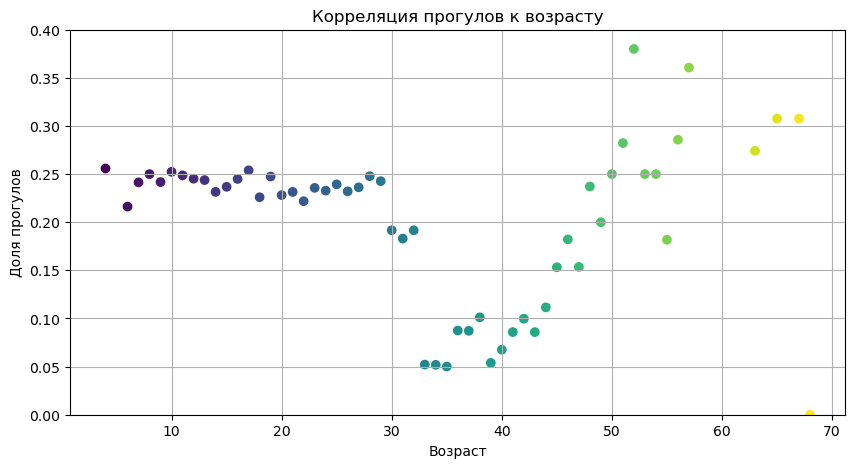

In [190]:
plt.figure(figsize=(10, 5))
plt.scatter(age_data_agg['age'], age_data_agg['status'], c=age_data_agg['age'])
plt.title('Корреляция прогулов к возрасту')
plt.xlabel('Возраст')
plt.ylabel('Доля прогулов')
plt.grid()

plt.ylim(0, 0.4)

plt.show()

По графику можем заметить, что люди до 30 имеют стабильную, довольно высокую долю пропусков, люди от 32 до 45 имеют довольно незначительную долю, а в категории 50+ наблюдается сильный разброс. Могу предположить, что увидеть стабильность можно среди группы 0-30 лет, т.к. в этой группе больше всего человек занимается.

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту, и к цене одновременно**
    - создай словарь цветов и цен в переменной `price_color`. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот, можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - аргумент  `с` - цвета для разных цен
          

In [191]:
prices = set(cost_age_data['cost']) # len(prices) = 4
colors = ('r', 'g', 'b', 'c')

price_color = dict(zip(prices, colors))
price_color

{1000: 'r', 1500: 'g', 500: 'b', 750: 'c'}

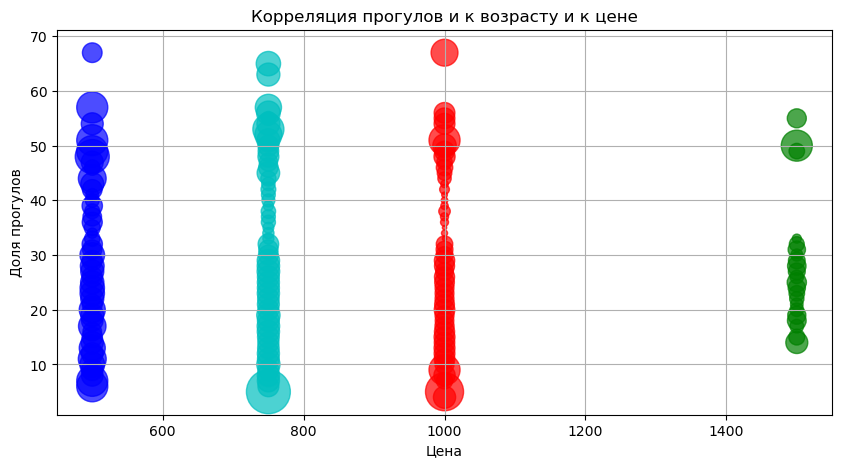

In [192]:
plt.figure(figsize=(10, 5))
plt.scatter(cost_age_data_agg['cost'], cost_age_data_agg['age'], s=cost_age_data_agg['status'] * 1000, c=cost_age_data_agg['cost'].map(price_color), alpha=0.7)
plt.title('Корреляция прогулов и к возрасту и к цене')
plt.xlabel('Цена')
plt.ylabel('Доля прогулов')
plt.grid()

plt.show()

По графику можем заметить, что больше всего прогулов наблюдается у людей до 10 лет, в первых трёх ценовых значениях, и у людей ~50 лет во всех ценовых значениях

## Задание 5

**Сделай heatmаp для кейса из задания 4.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй heatmap. Используй любые аргументы, но обязательно добавь вот эти:
    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике?

In [193]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [194]:
# кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,0-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217
4,500,36-40,0.175573
5,500,41-45,0.191489
6,500,46-50,0.285714
7,500,50+,0.307692
8,750,0-20,0.249445
9,750,21-25,0.250124


In [195]:
age_cost_pivot_table = cost_age_data_agg.pivot_table(
    values='status',
    index='age_bin',
    columns='cost',
    aggfunc='mean'
)

age_cost_pivot_table

cost,500,750,1000,1500
age_bin,,,,
0-20,0.286578,0.249445,0.206955,0.133663
21-25,0.283505,0.250124,0.190771,0.158784
26-30,0.255597,0.249445,0.191932,0.124706
31-35,0.165217,0.128114,0.069580,0.100313
36-40,0.175573,0.097115,0.035191,0.000000
41-45,0.191489,0.109646,0.067100,0.000000
46-50,0.285714,0.198748,0.171171,0.097561
50+,0.307692,0.296992,0.239130,0.176471


Text(220.72222222222223, 0.5, 'Возрастная группа')

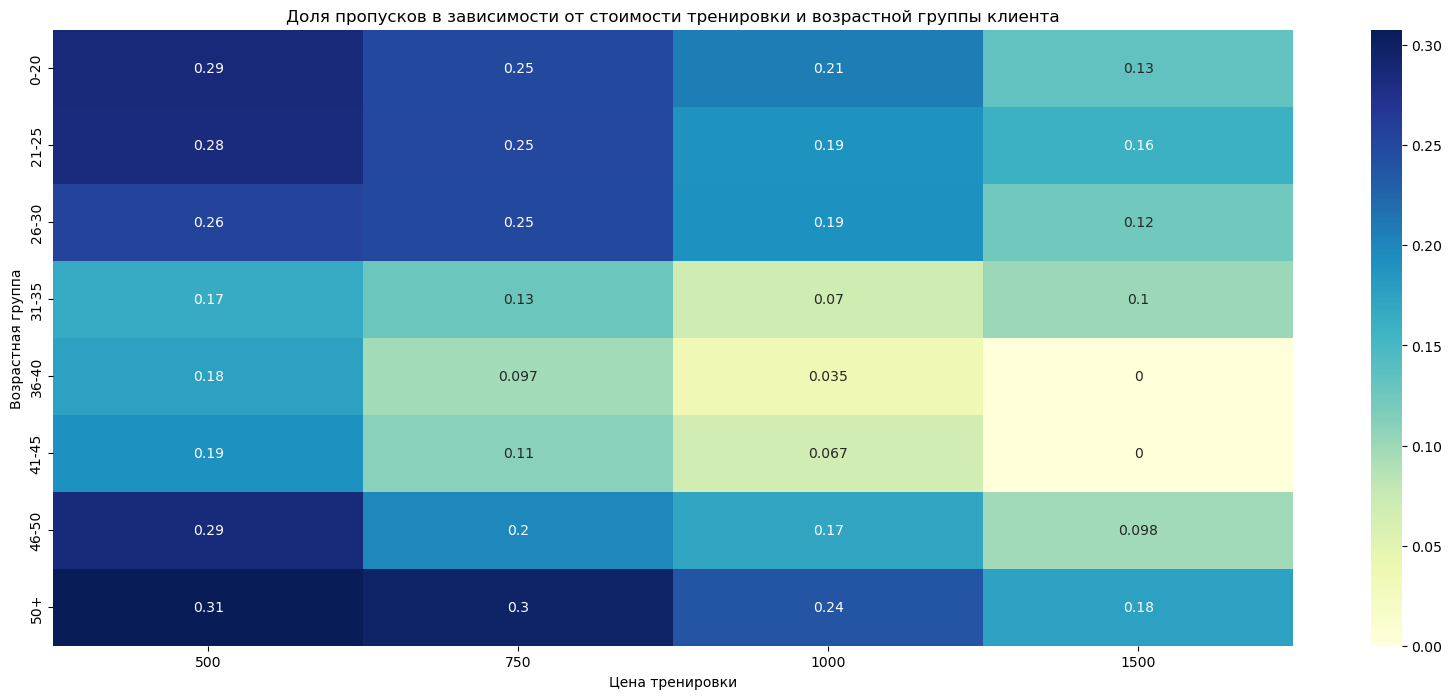

In [196]:
plt.figure(figsize=(20, 8))
sns.heatmap(age_cost_pivot_table,
           annot=True,
           cmap='YlGnBu')

plt.title('Доля пропусков в зависимости от стоимости тренировки и возрастной группы клиента')
plt.xlabel('Цена тренировки')
plt.ylabel('Возрастная группа')

По графику мы видим, что наибольшее среднее количество отменённых тренировок скапливается в районе самой дешёвой тренировки и на краях возрастных категорий.

## EXTRA

Если остались силы, сделай дополнительное задание по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти информацию самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалали:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью `dt.weekday`
    
    - добавили столбец с названием дня недели с помощью `dt.day_name()`
    

2. Cгруппируй данные колонки `week_day_num` по `workouts` с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - задай цвет на графике
    

4. Добавь горизонтальную линию, параллельную оси `X`, со значением `y` равным средним количеством тренировок в день. Если не помнишь, как это делать, смело смотри шпаргалку – там ты найдешь все детали.
5. Если еще осталось желание исследовать новое, можешь добавить на график название дней недели, задав их с помощью метода `plt.xticks`, его ты легко найдешь в документации. 
6. Оставь комментарий: что ты видишь на графике? 

**Подготовим данные**

#### Я сохранил данные не в trainings_by_day а в workouts_byday

In [197]:
workouts_byday # посмотрим, в каком формате лежат нужные данные

start_at
2020-01-01      1
2020-01-02      4
2020-01-03      5
2020-01-04      5
2020-01-05      9
             ... 
2020-12-04    365
2020-12-05    292
2020-12-06    250
2020-12-07    451
2020-12-08      3
Freq: D, Name: workout_id, Length: 343, dtype: int64

In [198]:
workouts_byday_frame = workouts_byday.reset_index() # сбросим индекс
workouts_byday_frame.columns=['workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому
workouts_byday_frame['week_day_num'] = workouts_byday_frame['workouts_date'].dt.weekday # добавим номер дня недели
workouts_byday_frame['week_day_name'] = workouts_byday_frame['workouts_date'].dt.day_name() # добавим название дня недели
workouts_byday_frame

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,1,2,Wednesday
1,2020-01-02,4,3,Thursday
2,2020-01-03,5,4,Friday
3,2020-01-04,5,5,Saturday
4,2020-01-05,9,6,Sunday
...,...,...,...,...
338,2020-12-04,365,4,Friday
339,2020-12-05,292,5,Saturday
340,2020-12-06,250,6,Sunday
341,2020-12-07,451,0,Monday


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [199]:
workouts_byday_frame['week_day_num'] += 1 

In [200]:
workouts_byday_week = workouts_byday_frame.groupby(workouts_byday_frame['week_day_num'])['workouts'].mean().reset_index()
workouts_byday_week

,week_day_num,workouts
0,1,366.387755
1,2,349.673469
2,3,332.857143
3,4,365.244898
4,5,304.326531
5,6,227.959184
6,7,190.142857


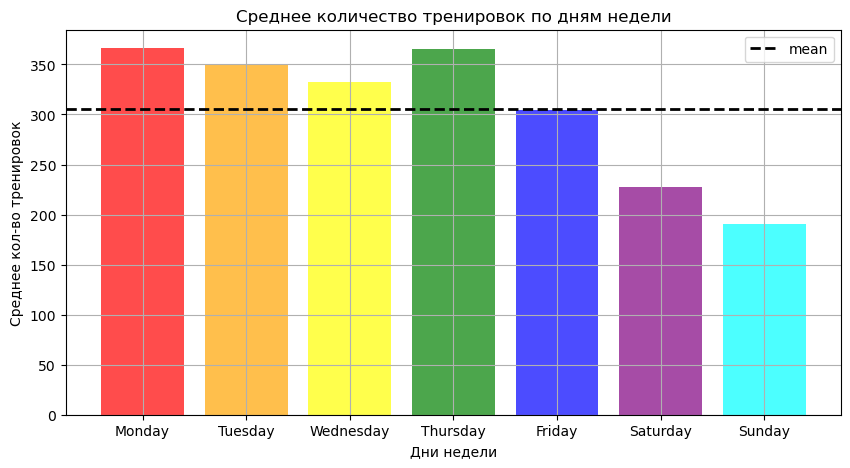

In [201]:
plt.figure(figsize=(10, 5))

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'cyan']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.bar(workouts_byday_week['week_day_num'], workouts_byday_week['workouts'], color=colors, alpha=0.7)

plt.title('Среднее количество тренировок по дням недели')
plt.xlabel('Дни недели')
plt.ylabel('Среднее кол-во тренировок')

plt.axhline(workouts_byday_week['workouts'].mean(), 
            color='k', 
            linestyle='--', 
            linewidth=2, 
            label = 'mean')

plt.xticks(ticks=range(1, 8), labels=days)

plt.grid()

plt.legend()

plt.show()

По графику видно, что меньше всего тренировок приходится на пятницу и выходные дни.

# 🎉🎉🎉 Поздравляем, ты великолепен! 